1. Continuum Fit
2. Continuum Subtraction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from mpdaf.obj import Spectrum
from linetools.spectra.xspectrum1d import XSpectrum1D

import astropy.units as u
from astropy.io import fits
from astropy.modeling.models import Voigt1D
from astropy.convolution import convolve
from astropy.constants import c, m_e

from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
from scipy import constants as const
from scipy.optimize import root_scalar

from mpdaf.MUSE import LSF
from IPython.display import display, Image, HTML
import corner

# 1. Continuum Fit

In [2]:
%matplotlib qt
import matplotlib.pyplot as plt

In [4]:
# (A)
hdus_A = fits.open('D:\Datacube\M1310-1714\spektrum_sum_2M1310-1714_A_0.6.fits')
spec_A = Spectrum('D:\Datacube\M1310-1714\spektrum_sum_2M1310-1714_A_0.6.fits')

flux_A = hdus_A['DATA'].data*u.Unit(hdus_A[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_A = hdus_A['STAT'].data*u.Unit(hdus_A[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_A = np.sqrt(variance_A) #uncertainty is standard deviation
wavelength_A = spec_A.wave.coord() * u.Unit(spec_A.wave.unit)# Wavelength array

sp_A = XSpectrum1D.from_tuple((wavelength_A, flux_A, uncertainty_A))
sp_A.plot()

In [13]:
# (B)
hdus_B = fits.open('D:\Datacube\M1310-1714\spektrum_sum_2M1310-1714_B_0.6.fits')
spec_B = Spectrum('D:\Datacube\M1310-1714\spektrum_sum_2M1310-1714_B_0.6.fits')

flux_B = hdus_B['DATA'].data*u.Unit(hdus_B[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_B = hdus_B['STAT'].data*u.Unit(hdus_B[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_B = np.sqrt(variance_B) #uncertainty is standard deviation
wavelength_B = spec_B.wave.coord() * u.Unit(spec_B.wave.unit)# Wavelength array

sp_B = XSpectrum1D.from_tuple((wavelength_B, flux_B, uncertainty_B))
sp_B.plot()

In [5]:
# (C)
hdus_C = fits.open('D:\Datacube\M1310-1714\spektrum_sum_2M1310-1714_C_0.6.fits')
spec_C = Spectrum('D:\Datacube\M1310-1714\spektrum_sum_2M1310-1714_C_0.6.fits')

flux_C = hdus_C['DATA'].data*u.Unit(hdus_C[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_C = hdus_C['STAT'].data*u.Unit(hdus_C[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_C = np.sqrt(variance_C) #uncertainty is standard deviation
wavelength_C = spec_C.wave.coord() * u.Unit(spec_C.wave.unit)# Wavelength array

sp_C = XSpectrum1D.from_tuple((wavelength_C, flux_C, uncertainty_C))
sp_C.plot()

In [6]:
# (D)
hdus_D = fits.open('D:\Datacube\M1310-1714\spektrum_sum_2M1310-1714_D_0.6.fits')
spec_D = Spectrum('D:\Datacube\M1310-1714\spektrum_sum_2M1310-1714_D_0.6.fits')

flux_D = hdus_D['DATA'].data*u.Unit(hdus_D[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_D = hdus_D['STAT'].data*u.Unit(hdus_D[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_D = np.sqrt(variance_D) #uncertainty is standard deviation
wavelength_D = spec_D.wave.coord() * u.Unit(spec_D.wave.unit)# Wavelength array

sp_D = XSpectrum1D.from_tuple((wavelength_D, flux_D, uncertainty_D))
sp_D.plot()

In [7]:
# (G)
hdus_G = fits.open('D:\Datacube\M1310-1714\spektrum_sum_2M1310-1714_G1_0.6.fits')
spec_G = Spectrum('D:\Datacube\M1310-1714\spektrum_sum_2M1310-1714_G1_0.6.fits')

flux_G = hdus_G['DATA'].data*u.Unit(hdus_G[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_G = hdus_G['STAT'].data*u.Unit(hdus_G[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_G = np.sqrt(variance_G) #uncertainty is standard deviation
wavelength_G = spec_G.wave.coord() * u.Unit(spec_G.wave.unit)# Wavelength array

sp_G = XSpectrum1D.from_tuple((wavelength_G, flux_G, uncertainty_G))
sp_G.plot()

In [8]:
# (G2)
hdus_G2 = fits.open('D:\Datacube\M1310-1714\spektrum_sum_2M1310-1714_G2_0.6.fits')
spec_G2 = Spectrum('D:\Datacube\M1310-1714\spektrum_sum_2M1310-1714_G2_0.6.fits')

flux_G2 = hdus_G2['DATA'].data*u.Unit(hdus_G2[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_G2 = hdus_G2['STAT'].data*u.Unit(hdus_G2[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_G2 = np.sqrt(variance_G2) #uncertainty is standard deviation
wavelength_G2 = spec_G2.wave.coord() * u.Unit(spec_G2.wave.unit)# Wavelength array

sp_G2 = XSpectrum1D.from_tuple((wavelength_G2, flux_G2, uncertainty_G2))
sp_G2.plot()

In [9]:
z = 0.293

## (A) Ca II Continuum Fit

In [10]:
flux_masked_A = flux_A[260:370]
uncertainty_masked_A = uncertainty_A[260:370]
rest_wavelength_masked_A = wavelength_A[260:370]/(1+z)

sp_masked_rest_A = XSpectrum1D.from_tuple((rest_wavelength_masked_A, flux_masked_A, uncertainty_masked_A))
sp_masked_rest_A.plot()

In [61]:
sp_masked_rest_A.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [62]:
sp_masked_rest_A.co

<Quantity [2728.6763, 2688.7385, 2681.8982, 2675.772 , 2670.3462,
           2665.6067, 2661.5393, 2658.1301, 2655.3647, 2653.2297,
           2651.7104, 2650.7932, 2650.4639, 2650.7083, 2651.5127,
           2652.8625, 2654.7444, 2657.6987, 2663.349 , 2671.2507,
           2680.786 , 2691.3364, 2702.2844, 2713.012 , 2722.9011,
           2731.334 , 2737.6926, 2741.3586, 2741.7683, 2739.1028,
           2734.048 , 2727.2966, 2719.542 , 2711.4768, 2703.7944,
           2697.1877, 2692.35  , 2689.974 , 2690.7532, 2694.136 ,
           2698.175 , 2702.687 , 2707.525 , 2712.5408, 2717.5874,
           2722.5173, 2727.1829, 2731.437 , 2735.132 , 2738.1206,
           2740.6653, 2743.208 , 2745.745 , 2748.2732, 2750.7878,
           2753.2852, 2755.7615, 2758.2122, 2760.6338, 2763.0222,
           2765.3733, 2767.6973, 2770.0012, 2772.2795, 2774.527 ,
           2776.7383, 2778.9077, 2781.0303, 2783.1   , 2785.1125,
           2787.0615, 2788.9326, 2790.23  , 2790.7805, 2790.7327,
          

In [63]:
np.savez("D:\Datacube\M1310-1714\continuum_2M1310-1714_A.npz", values=sp_masked_rest_A.co.value, unit=str(sp_masked_rest_A.co.unit))

## (A) Na I Continuum Fit

In [11]:
flux_masked_A2 = flux_A[2290:2370]
uncertainty_masked_A2 = uncertainty_A[2290:2370]
rest_wavelength_masked_A2 = wavelength_A[2290:2370]/(1+z)

sp_masked_rest_A2 = XSpectrum1D.from_tuple((rest_wavelength_masked_A2, flux_masked_A2, uncertainty_masked_A2))
sp_masked_rest_A2.plot()

In [98]:
sp_masked_rest_A2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [99]:
sp_masked_rest_A2.co

<Quantity [2100.0154, 2147.5132, 2153.3271, 2158.9321, 2164.3442,
           2169.5806, 2174.6577, 2179.5923, 2184.4011, 2189.1008,
           2193.708 , 2198.2397, 2202.7122, 2207.1423, 2211.5466,
           2215.9421, 2220.3455, 2224.7744, 2229.512 , 2234.591 ,
           2239.7664, 2244.792 , 2249.4226, 2253.413 , 2256.5176,
           2258.491 , 2259.0874, 2258.0618, 2255.1682, 2249.318 ,
           2240.9326, 2233.7048, 2226.756 , 2219.7256, 2212.6392,
           2205.522 , 2198.4001, 2191.2993, 2184.2446, 2177.2622,
           2170.3777, 2163.6167, 2157.0046, 2150.5671, 2144.3303,
           2138.3193, 2132.5603, 2127.0784, 2121.8997, 2117.0886,
           2113.082 , 2109.91  , 2107.4631, 2105.6338, 2104.3127,
           2103.3918, 2102.7625, 2102.3162, 2101.9438, 2101.628 ,
           2101.6064, 2101.7986, 2102.0889, 2102.361 , 2102.4995,
           2102.388 , 2101.9106, 2101.1104, 2100.213 , 2099.2202,
           2098.1294, 2096.9368, 2095.6394, 2094.2344, 2092.7185,
          

In [100]:
np.savez("D:\Datacube\M1310-1714\continuum_2M1310-1714_A_Nai.npz", values=sp_masked_rest_A2.co.value, unit=str(sp_masked_rest_A2.co.unit))

## (B) Ca II Continuum Fit

In [14]:
flux_masked_B = flux_B[260:370]
uncertainty_masked_B = uncertainty_B[260:370]
rest_wavelength_masked_B = wavelength_B[260:370]/(1+z)

sp_masked_rest_B = XSpectrum1D.from_tuple((rest_wavelength_masked_B, flux_masked_B, uncertainty_masked_B))
sp_masked_rest_B.plot()

In [65]:
sp_masked_rest_B.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [66]:
sp_masked_rest_B.co

<Quantity [2537.3025, 2513.9028, 2510.597 , 2507.512 , 2504.6353,
           2501.9531, 2499.453 , 2497.121 , 2494.9446, 2492.9102,
           2491.0046, 2489.2148, 2487.5278, 2485.93  , 2484.4082,
           2482.9497, 2481.5408, 2480.3318, 2479.8142, 2479.9   ,
           2480.4514, 2481.3308, 2482.4   , 2483.5212, 2484.557 ,
           2485.369 , 2485.8196, 2485.7708, 2484.4258, 2480.4243,
           2474.3093, 2466.7056, 2458.2375, 2449.5298, 2441.207 ,
           2433.8936, 2428.2139, 2424.7927, 2424.2546, 2427.0095,
           2432.6233, 2440.516 , 2450.1104, 2460.8281, 2472.0918,
           2483.3235, 2493.9453, 2503.3796, 2511.0488, 2516.3752,
           2520.204 , 2524.0112, 2527.737 , 2531.3179, 2534.6907,
           2537.7917, 2540.558 , 2542.9263, 2544.8328, 2546.214 ,
           2547.0076, 2547.233 , 2547.0178, 2546.474 , 2545.7126,
           2544.8452, 2543.9832, 2543.2378, 2542.7205, 2542.5427,
           2542.8162, 2543.646 , 2544.7942, 2546.0823, 2547.505 ,
          

In [67]:
np.savez("D:\Datacube\M1310-1714\continuum_2M1310-1714_B.npz", values=sp_masked_rest_B.co.value, unit=str(sp_masked_rest_B.co.unit))

## (B) Na I Continuum Fit

In [15]:
flux_masked_B2 = flux_B[2290:2370]
uncertainty_masked_B2 = uncertainty_B[2290:2370]
rest_wavelength_masked_B2 = wavelength_B[2290:2370]/(1+z)

sp_masked_rest_B2 = XSpectrum1D.from_tuple((rest_wavelength_masked_B2, flux_masked_B2, uncertainty_masked_B2))
sp_masked_rest_B2.plot()

In [94]:
sp_masked_rest_B2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [95]:
sp_masked_rest_B2.co

<Quantity [2105.0813, 2126.2556, 2130.1318, 2133.8035, 2137.2827,
           2140.581 , 2143.7102, 2146.6816, 2149.5076, 2152.1995,
           2154.7688, 2157.2275, 2159.5874, 2161.86  , 2164.0574,
           2166.1907, 2168.272 , 2170.312 , 2172.129 , 2173.5977,
           2174.746 , 2175.6008, 2176.1897, 2176.5396, 2176.678 ,
           2176.6323, 2176.4294, 2176.0967, 2175.6619, 2175.1516,
           2174.5935, 2173.7888, 2171.5781, 2167.956 , 2163.116 ,
           2157.2512, 2150.5552, 2143.2212, 2135.4426, 2127.4126,
           2119.3247, 2111.3723, 2103.7488, 2096.6472, 2090.2612,
           2084.784 , 2080.4087, 2077.329 , 2075.7383, 2076.352 ,
           2082.1455, 2091.7678, 2103.062 , 2113.871 , 2122.0378,
           2125.7646, 2128.0474, 2129.9055, 2131.1064, 2131.418 ,
           2130.6077, 2128.443 , 2124.6917, 2119.7407, 2114.2688,
           2108.2043, 2101.4722, 2093.9973, 2085.9326, 2077.7812,
           2069.5417, 2061.1887, 2052.6965, 2044.0399, 2035.1934,
          

In [96]:
np.savez("D:\Datacube\M1310-1714\continuum_2M1310-1714_B_Nai.npz", values=sp_masked_rest_B2.co.value, unit=str(sp_masked_rest_B2.co.unit))

## (C) Ca II Continuum Fit

In [16]:
flux_masked_C = flux_C[260:370]
uncertainty_masked_C = uncertainty_C[260:370]
rest_wavelength_masked_C = wavelength_C[260:370]/(1+z)

sp_masked_rest_C = XSpectrum1D.from_tuple((rest_wavelength_masked_C, flux_masked_C, uncertainty_masked_C))
sp_masked_rest_C.plot()

In [73]:
sp_masked_rest_C.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [74]:
sp_masked_rest_C.co

<Quantity [737.8135 , 755.08496, 757.72455, 760.20734, 762.52264,
           764.6598 , 766.60803, 768.35675, 769.8952 , 771.21265,
           772.29846, 773.1419 , 773.7323 , 774.05896, 774.11115,
           773.8782 , 773.34937, 772.4508 , 771.01306, 769.1339 ,
           766.9322 , 764.52673, 762.03644, 759.57996, 757.27625,
           755.2441 , 753.6023 , 752.46967, 751.77124, 751.1062 ,
           750.4833 , 749.93176, 749.481  , 749.1602 , 748.9988 ,
           749.02594, 749.27106, 749.7634 , 750.5323 , 751.5039 ,
           752.5129 , 753.5581 , 754.64154, 755.7651 , 756.93085,
           758.1406 , 759.39655, 760.70044, 762.0544 , 763.46027,
           764.90686, 766.3771 , 767.86804, 769.37714, 770.9014 ,
           772.4383 , 773.9849 , 775.53864, 777.09656, 778.656  ,
           780.2145 , 781.8784 , 783.7122 , 785.68024, 787.74677,
           789.87634, 792.03314, 794.18164, 796.28625, 798.3112 ,
           800.221  , 801.95795, 802.3549 , 801.0434 , 798.41095,
          

In [75]:
np.savez("D:\Datacube\M1310-1714\continuum_2M1310-1714_C.npz", values=sp_masked_rest_C.co.value, unit=str(sp_masked_rest_C.co.unit))

## (C) Na I Continuum Fit

In [17]:
flux_masked_C2 = flux_C[2290:2370]
uncertainty_masked_C2 = uncertainty_C[2290:2370]
rest_wavelength_masked_C2 = wavelength_C[2290:2370]/(1+z)

sp_masked_rest_C2 = XSpectrum1D.from_tuple((rest_wavelength_masked_C2, flux_masked_C2, uncertainty_masked_C2))
sp_masked_rest_C2.plot()

In [90]:
sp_masked_rest_C2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [91]:
sp_masked_rest_C2.co

<Quantity [826.0169 , 847.80536, 850.4052 , 852.9363 , 855.4045 ,
           857.8159 , 860.17664, 862.49274, 864.7702 , 867.01514,
           869.2335 , 871.4315 , 873.61505, 875.7903 , 877.9632 ,
           880.1399 , 882.32635, 884.5284 , 886.6773 , 888.7186 ,
           890.6531 , 892.48126, 894.2039 , 895.82184, 897.3356 ,
           898.7459 , 900.0535 , 901.2591 , 902.3634 , 903.03864,
           902.6364 , 901.24866, 898.99255, 895.9855 , 892.34454,
           888.18713, 883.63043, 878.79175, 873.78827, 868.73737,
           863.75616, 858.962  , 854.4721 , 850.40375, 846.87415,
           844.0006 , 841.9004 , 840.69073, 840.52234, 842.02167,
           844.45   , 846.5614 , 847.29706, 847.5361 , 847.59845,
           847.45844, 847.09033, 846.4683 , 845.5667 , 844.35974,
           842.8216 , 840.92664, 838.1487 , 833.72546, 828.35004,
           822.76605, 817.7173 , 813.9475 , 811.4642 , 809.3535 ,
           807.5978 , 806.19574, 805.14606, 804.4475 , 804.0989 ,
          

In [92]:
np.savez("D:\Datacube\M1310-1714\continuum_2M1310-1714_C_Nai.npz", values=sp_masked_rest_C2.co.value, unit=str(sp_masked_rest_C2.co.unit))

## (D) Ca II Continuum Fit

In [18]:
flux_masked_D = flux_D[260:370]
uncertainty_masked_D = uncertainty_D[260:370]
rest_wavelength_masked_D = wavelength_D[260:370]/(1+z)

sp_masked_rest_D = XSpectrum1D.from_tuple((rest_wavelength_masked_D, flux_masked_D, uncertainty_masked_D))
sp_masked_rest_D.plot()

In [82]:
sp_masked_rest_D.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [83]:
sp_masked_rest_D.co

<Quantity [2603.2637, 2632.399 , 2636.3774, 2640.1648, 2643.7634,
           2647.175 , 2650.4019, 2653.4463, 2656.3103, 2658.9958,
           2661.5054, 2663.8408, 2666.0044, 2667.9983, 2669.8245,
           2671.485 , 2672.9824, 2674.2722, 2675.2107, 2675.8152,
           2676.1167, 2676.1467, 2675.9363, 2675.5168, 2674.9197,
           2674.1758, 2673.3164, 2672.373 , 2670.876 , 2667.8274,
           2663.5803, 2658.5483, 2653.144 , 2647.781 , 2642.8716,
           2638.8293, 2636.0674, 2634.9983, 2636.0356, 2638.7886,
           2642.0054, 2645.6057, 2649.5315, 2653.7253, 2658.1296,
           2662.6865, 2667.3384, 2672.0278, 2676.6973, 2681.2886,
           2685.9836, 2690.9949, 2696.2346, 2701.614 , 2707.0444,
           2712.4375, 2717.7043, 2722.7568, 2727.5059, 2731.863 ,
           2735.7363, 2737.6592, 2736.8604, 2733.9004, 2729.3398,
           2723.7393, 2717.659 , 2711.6597, 2706.3015, 2702.1453,
           2699.7515, 2699.649 , 2700.5105, 2701.3904, 2702.2917,
          

In [84]:
np.savez("D:\Datacube\M1310-1714\continuum_2M1310-1714_D.npz", values=sp_masked_rest_D.co.value, unit=str(sp_masked_rest_D.co.unit))

## (D) Na I Continuum Fit

In [19]:
flux_masked_D2 = flux_D[2290:2370]
uncertainty_masked_D2 = uncertainty_D[2290:2370]
rest_wavelength_masked_D2 = wavelength_D[2290:2370]/(1+z)

sp_masked_rest_D2 = XSpectrum1D.from_tuple((rest_wavelength_masked_D2, flux_masked_D2, uncertainty_masked_D2))
sp_masked_rest_D2.plot()

In [86]:
sp_masked_rest_D2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [87]:
sp_masked_rest_D2.co

<Quantity [1973.7401, 1995.7656, 1995.9203, 1996.5415, 1997.6143,
           1999.1237, 2001.055 , 2003.3934, 2006.1241, 2009.232 ,
           2012.7026, 2016.5209, 2020.6719, 2025.141 , 2029.9132,
           2034.9736, 2040.3076, 2045.9144, 2054.4768, 2066.402 ,
           2079.38  , 2091.0996, 2099.251 , 2101.6511, 2101.6511,
           2101.6511, 2101.6511, 2101.6511, 2101.6511, 2101.6511,
           2101.6511, 2101.3699, 2099.8242, 2097.043 , 2093.1553,
           2088.291 , 2082.579 , 2076.1487, 2069.1294, 2061.6506,
           2053.8413, 2045.8308, 2037.7485, 2029.7239, 2021.886 ,
           2014.3641, 2007.2878, 2000.7861, 1994.9885, 1989.9213,
           1985.1942, 1980.754 , 1976.5996, 1972.7301, 1969.1448,
           1965.8425, 1962.8225, 1961.031 , 1963.5862, 1968.692 ,
           1974.0125, 1977.2113, 1976.1195, 1970.8704, 1962.669 ,
           1952.6348, 1941.8877, 1931.5472, 1922.7332, 1916.5651,
           1913.5995, 1911.865 , 1911.0769, 1911.252 , 1912.4073,
          

In [88]:
np.savez("D:\Datacube\M1310-1714\continuum_2M1310-1714_D_Nai.npz", values=sp_masked_rest_D2.co.value, unit=str(sp_masked_rest_D2.co.unit))

## (G1) Ca II Continuum Fit

In [20]:
flux_masked_G = flux_G[260:370]
uncertainty_masked_G = uncertainty_G[260:370]
rest_wavelength_masked_G = wavelength_G[260:370]/(1+z)

sp_masked_rest_G = XSpectrum1D.from_tuple((rest_wavelength_masked_G, flux_masked_G, uncertainty_masked_G))
sp_masked_rest_G.plot()

In [34]:
sp_masked_rest_G.fit_continuum()

knots file exists, use this? (y) n


C:\Users\hp\anaconda3\lib\site-packages\linetools\analysis\interactive_plot.py:347: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".r" (-> marker='.'). The keyword argument will take precedence.
  m0, = a1.plot([0],[0],'.r',marker='.', mec='none', lw=0, mew=0,



i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [35]:
sp_masked_rest_G.co

<Quantity [1453.6271, 1599.4252, 1593.1086, 1592.6716, 1601.8184,
           1615.9459, 1613.6223, 1568.2452, 1523.4255, 1530.5786,
           1594.5853, 1662.153 , 1728.966 , 1794.0448, 1823.8601,
           1823.3604, 1824.2218, 1824.8384, 1825.212 , 1825.345 ,
           1825.2391, 1824.8966, 1824.3196, 1823.5099, 1822.4697,
           1821.201 , 1819.706 , 1817.9867, 1816.045 , 1813.8833,
           1811.5033, 1808.9073, 1806.0973, 1803.0752, 1799.8433,
           1796.4034, 1792.7579, 1788.9086, 1784.8577, 1780.607 ,
           1776.1589, 1771.5153, 1766.6782, 1761.6498, 1756.432 ,
           1751.027 , 1745.4368, 1739.6635, 1733.709 , 1727.5756,
           1721.2651, 1714.7799, 1708.1217, 1701.2927, 1694.2952,
           1687.1309, 1679.8019, 1672.3104, 1663.3384, 1636.0931,
           1640.1694, 1690.4465, 1710.9429, 1724.2534, 1737.5236,
           1750.7524, 1763.9397, 1777.0847, 1790.1871, 1803.2462,
           1816.2615, 1829.2324, 1842.1584, 1855.0391, 1867.8738,
          

In [52]:
np.savez("D:\Datacube\M1310-1714\continuum_2M1310-1714_G.npz", values=sp_masked_rest_G.co.value, unit=str(sp_masked_rest_G.co.unit))

## (G1) Na I Continuum Fit

In [21]:
flux_masked_G_B = flux_G[2290:2370]
uncertainty_masked_G_B = uncertainty_G[2290:2370]
rest_wavelength_masked_G_B = wavelength_G[2290:2370]/(1+z)

sp_masked_rest_G_B = XSpectrum1D.from_tuple((rest_wavelength_masked_G_B, flux_masked_G_B, uncertainty_masked_G_B))
sp_masked_rest_G_B.plot()

In [38]:
sp_masked_rest_G_B.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [39]:
sp_masked_rest_G_B.co

<Quantity [4595.344 , 4597.5986, 4576.3237, 4568.8237, 4570.2085,
           4588.1006, 4639.483 , 4669.898 , 4597.5894, 4551.1157,
           4561.053 , 4574.3926, 4568.654 , 4548.038 , 4523.6133,
           4499.2573, 4478.847 , 4466.2314, 4458.25  , 4450.658 ,
           4443.4463, 4436.6045, 4430.121 , 4423.9863, 4418.1904,
           4412.722 , 4407.5713, 4402.727 , 4398.18  , 4393.9194,
           4389.9346, 4386.2153, 4382.7515, 4379.5317, 4376.547 ,
           4373.7856, 4371.2383, 4368.894 , 4366.7427, 4364.7734,
           4362.9766, 4361.341 , 4359.8564, 4358.513 , 4357.3003,
           4356.4697, 4358.1143, 4363.2485, 4372.56  , 4399.6636,
           4452.7085, 4477.48  , 4487.867 , 4497.9165, 4507.619 ,
           4516.9653, 4525.9463, 4534.5522, 4542.7744, 4550.603 ,
           4558.029 , 4565.043 , 4571.636 , 4578.0347, 4584.515 ,
           4591.056 , 4597.636 , 4604.2334, 4610.8267, 4617.393 ,
           4623.912 , 4630.361 , 4636.7183, 4642.9624, 4649.0713,
          

In [53]:
np.savez("D:\Datacube\M1310-1714\continuum_2M1310-1714_G_Nai.npz", values=sp_masked_rest_G_B.co.value, unit=str(sp_masked_rest_G_B.co.unit))

## (G2) Ca II Continuum Fit

In [22]:
flux_masked_G2 = flux_G2[260:370]
uncertainty_masked_G2 = uncertainty_G2[260:370]
rest_wavelength_masked_G2 = wavelength_G2[260:370]/(1+z)

sp_masked_rest_G2 = XSpectrum1D.from_tuple((rest_wavelength_masked_G2, flux_masked_G2, uncertainty_masked_G2))
sp_masked_rest_G2.plot()

In [42]:
sp_masked_rest_G2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [43]:
sp_masked_rest_G2.co

<Quantity [1337.9415, 1320.1895, 1355.4579, 1390.7263, 1423.6333,
           1455.1869, 1486.323 , 1513.3381, 1534.5803, 1548.8508,
           1518.1965, 1497.7975, 1532.5219, 1570.9224, 1592.6862,
           1609.8689, 1618.1556, 1621.8196, 1620.5585, 1615.6744,
           1609.0681, 1602.4468, 1597.5173, 1599.8738, 1606.5273,
           1599.9113, 1579.4113, 1555.2916, 1537.4171, 1524.362 ,
           1512.581 , 1502.6515, 1494.8541, 1487.7324, 1480.9996,
           1474.6539, 1468.6931, 1463.1155, 1457.919 , 1453.1016,
           1448.6615, 1444.5968, 1440.9054, 1437.5854, 1434.6349,
           1432.0519, 1429.8345, 1427.9807, 1426.4886, 1425.3563,
           1424.5818, 1424.1631, 1424.0983, 1424.3855, 1425.0226,
           1426.0079, 1427.3392, 1429.0148, 1431.0326, 1433.522 ,
           1440.274 , 1452.5603, 1472.7424, 1498.7681, 1512.8434,
           1523.4984, 1534.0566, 1545.3293, 1556.746 , 1568.1561,
           1579.565 , 1590.977 , 1602.3973, 1613.8308, 1625.2822,
          

In [54]:
np.savez("D:\Datacube\M1310-1714\continuum_2M1310-1714_G2.npz", values=sp_masked_rest_G2.co.value, unit=str(sp_masked_rest_G2.co.unit))

## (G2) Na I Continuum Fit

In [23]:
flux_masked_G2_B = flux_G2[2290:2370]
uncertainty_masked_G2_B = uncertainty_G2[2290:2370]
rest_wavelength_masked_G2_B = wavelength_G2[2290:2370]/(1+z)

sp_masked_rest_G2_B = XSpectrum1D.from_tuple((rest_wavelength_masked_G2_B, flux_masked_G2_B, uncertainty_masked_G2_B))
sp_masked_rest_G2_B.plot()

In [46]:
sp_masked_rest_G2_B.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [47]:
sp_masked_rest_G2_B.co

<Quantity [4258.1724, 4291.462 , 4282.261 , 4274.435 , 4268.0874,
           4263.3223, 4260.244 , 4258.9575, 4259.566 , 4262.1865,
           4267.2085, 4274.347 , 4283.013 , 4292.6187, 4302.574 ,
           4312.2915, 4321.1816, 4328.6455, 4332.2295, 4331.802 ,
           4329.412 , 4327.11  , 4326.946 , 4363.9863, 4439.6333,
           4490.66  , 4325.8735, 4163.691 , 4275.651 , 4281.3994,
           4277.6953, 4273.9897, 4270.277 , 4266.5513, 4262.8076,
           4259.04  , 4255.244 , 4251.414 , 4247.544 , 4243.6294,
           4239.664 , 4235.643 , 4231.5605, 4227.412 , 4223.1914,
           4218.8936, 4214.5127, 4210.0444, 4205.482 , 4200.8213,
           4196.056 , 4191.181 , 4186.1914, 4181.0815, 4175.845 ,
           4170.4785, 4164.975 , 4159.0376, 4152.176 , 4145.0957,
           4138.5723, 4133.3804, 4130.3433, 4134.026 , 4145.29  ,
           4161.663 , 4180.6724, 4199.845 , 4216.709 , 4228.792 ,
           4237.655 , 4246.417 , 4254.98  , 4263.246 , 4271.1157,
          

In [55]:
np.savez("D:\Datacube\M1310-1714\continuum_2M1310-1714_G2_Nai.npz", values=sp_masked_rest_G2_B.co.value, unit=str(sp_masked_rest_G2_B.co.unit))

# 2. Continuum Subtraction

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

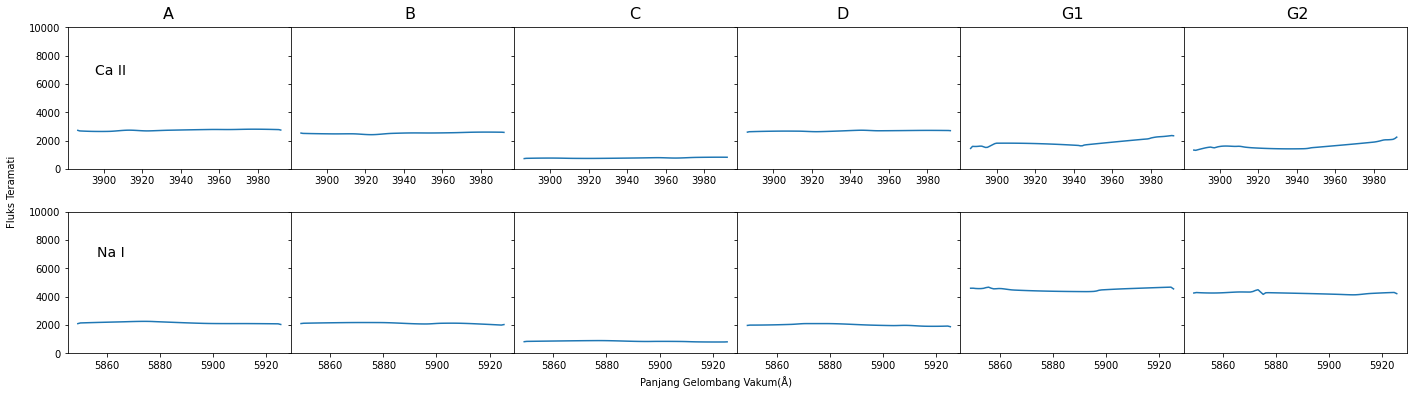

In [25]:
# (A) Ca II
wave0_A = spec_A.wave.coord() * u.Unit(spec_A.wave.unit) # Wavelength array
F0_A = spec_A.data * u.Unit(spec_A.unit) # Flux array
wave_A = wave0_A[260:370]/(1+z)
F_A = F0_A[260:370]
uncertain_A = uncertainty_A[260:370]

loaded_data_A = np.load("D:\Datacube\M1310-1714\continuum_2M1310-1714_A.npz")
co_A = loaded_data_A["values"] * u.Unit(spec_A.unit)

# (A) Na I
wave_A2 = wave0_A[2290:2370]/(1+z)
F_A2 = F0_A[2290:2370]
uncertain_A2 = uncertainty_A[2290:2370]

loaded_data_A2 = np.load("D:\Datacube\M1310-1714\continuum_2M1310-1714_A_Nai.npz")
co_A2 = loaded_data_A2["values"] * u.Unit(spec_A.unit)

# (B) Ca II
wave0_B = spec_B.wave.coord() * u.Unit(spec_B.wave.unit) # Wavelength array
F0_B = spec_B.data * u.Unit(spec_B.unit) # Flux array
wave_B = wave0_B[260:370]/(1+z)
F_B = F0_B[260:370]
uncertain_B = uncertainty_B[260:370]

loaded_data_B = np.load("D:\Datacube\M1310-1714\continuum_2M1310-1714_B.npz")
co_B = loaded_data_B["values"] * u.Unit(spec_B.unit)

# (B) Na I
wave_B2 = wave0_B[2290:2370]/(1+z)
F_B2 = F0_B[2290:2370]
uncertain_B2 = uncertainty_B[2290:2370]

loaded_data_B2 = np.load("D:\Datacube\M1310-1714\continuum_2M1310-1714_B_Nai.npz")
co_B2 = loaded_data_B2["values"] * u.Unit(spec_B.unit)

# (C) Ca II
wave0_C = spec_C.wave.coord() * u.Unit(spec_C.wave.unit) # Wavelength array
F0_C = spec_C.data * u.Unit(spec_C.unit) # Flux array
wave_C = wave0_C[260:370]/(1+z)
F_C = F0_C[260:370]
uncertain_C = uncertainty_C[260:370]

loaded_data_C = np.load("D:\Datacube\M1310-1714\continuum_2M1310-1714_C.npz")
co_C = loaded_data_C["values"] * u.Unit(spec_C.unit)

# (C) Na I
wave_C2 = wave0_C[2290:2370]/(1+z)
F_C2 = F0_C[2290:2370]
uncertain_C2 = uncertainty_C[2290:2370]

loaded_data_C2 = np.load("D:\Datacube\M1310-1714\continuum_2M1310-1714_C_Nai.npz")
co_C2 = loaded_data_C2["values"] * u.Unit(spec_C.unit)

# (D) Ca II
wave0_D = spec_D.wave.coord() * u.Unit(spec_D.wave.unit) # Wavelength array
F0_D = spec_D.data * u.Unit(spec_D.unit) # Flux array
wave_D = wave0_D[260:370]/(1+z)
F_D = F0_D[260:370]
uncertain_D = uncertainty_D[260:370]

loaded_data_D = np.load("D:\Datacube\M1310-1714\continuum_2M1310-1714_D.npz")
co_D = loaded_data_D["values"] * u.Unit(spec_D.unit)

# (D) Na I
wave_D2 = wave0_D[2290:2370]/(1+z)
F_D2 = F0_D[2290:2370]
uncertain_D2 = uncertainty_D[2290:2370]

loaded_data_D2 = np.load("D:\Datacube\M1310-1714\continuum_2M1310-1714_D_Nai.npz")
co_D2 = loaded_data_D2["values"] * u.Unit(spec_D.unit)

# (G1) Ca II
wave0_G = spec_G.wave.coord() * u.Unit(spec_G.wave.unit) # Wavelength array
F0_G = spec_G.data * u.Unit(spec_G.unit) # Flux array
wave_G = wave0_G[260:370]/(1+z)
F_G = F0_G[260:370]
uncertain_G = uncertainty_G[260:370]

loaded_data_G = np.load("D:\Datacube\M1310-1714\continuum_2M1310-1714_G.npz")
co_G = loaded_data_G["values"] * u.Unit(spec_G.unit)

# (G1) Na I
wave_G_B = wave0_G[2290:2370]/(1+z)
F_G_B = F0_G[2290:2370]
uncertain_G_B = uncertainty_G[2290:2370]

loaded_data_G_B = np.load("D:\Datacube\M1310-1714\continuum_2M1310-1714_G_Nai.npz")
co_G_B = loaded_data_G_B["values"] * u.Unit(spec_G.unit)

# (G2) Ca II
wave0_G2 = spec_G2.wave.coord() * u.Unit(spec_G2.wave.unit) # Wavelength array
F0_G2 = spec_G2.data * u.Unit(spec_G2.unit) # Flux array
wave_G2 = wave0_G2[260:370]/(1+z)
F_G2 = F0_G2[260:370]
uncertain_G2 = uncertainty_G2[260:370]

loaded_data_G2 = np.load("D:\Datacube\M1310-1714\continuum_2M1310-1714_G2.npz")
co_G2 = loaded_data_G2["values"] * u.Unit(spec_G2.unit)

# (G2) Na I
wave_G2_B = wave0_G2[2290:2370]/(1+z)
F_G2_B = F0_G2[2290:2370]
uncertain_G2_B = uncertainty_G2[2290:2370]

loaded_data_G2_B = np.load("D:\Datacube\M1310-1714\continuum_2M1310-1714_G2_Nai.npz")
co_G2_B = loaded_data_G2_B["values"] * u.Unit(spec_G2.unit)


# Plot
f, ax = plt.subplots(2, 6, sharey='row', figsize=(24,6), gridspec_kw={'hspace': 0.3, 'wspace':0})

ax[0,0].plot(wave_A, co_A)
ax[0,0].set_ylim(0, 10000)
ax[1,0].plot(wave_A2, co_A2)
ax[1,0].set_ylim(0, 10000)
ax[0,1].plot(wave_B, co_B)
ax[1,1].plot(wave_B2, co_B2)
ax[0,2].plot(wave_C, co_C)
ax[1,2].plot(wave_C2, co_C2)
ax[0,3].plot(wave_D, co_D)
ax[1,3].plot(wave_D2, co_D2)
ax[0,4].plot(wave_G, co_G)
ax[1,4].plot(wave_G_B, co_G_B)
ax[0,5].plot(wave_G2, co_G2)
ax[1,5].plot(wave_G2_B, co_G2_B)

f.text(0.15,0.77, 'Ca II', fontsize=14, ha='center')
f.text(0.15,0.35, 'Na I', fontsize=14, ha='center')

f.text(0.18, 0.91, 'A', va='center', fontsize=16)
f.text(0.32, 0.91, 'B', va='center', fontsize=16)
f.text(0.45, 0.91, 'C', va='center', fontsize=16)
f.text(0.57, 0.91, 'D', va='center', fontsize=16)
f.text(0.7, 0.91, 'G1', va='center', fontsize=16)
f.text(0.83, 0.91, 'G2', va='center', fontsize=16)
f.text(0.5, 0.05, 'Panjang Gelombang Vakum(Å)', ha='center')
f.text(0.09, 0.5, 'Fluks Teramati', va='center', rotation='vertical')
plt.show()

In [29]:
# Ca II
lambda_3935 = 3934.777
f3935 = 6.82e-01
A3935 = 1.47e+08

lambda_3970 = 3969.591
f3970 = 3.3e-01
A3970 = 1.4e+08

# Na I
lambda_5892 = 5891.583253
f5892 = 6.41e-01
A5892 = 6.16e+07

lambda_5898 = 5897.558147
f5898 = 3.20e-01
A5898 = 6.14e+07

c_kms = c.to('km/s').value

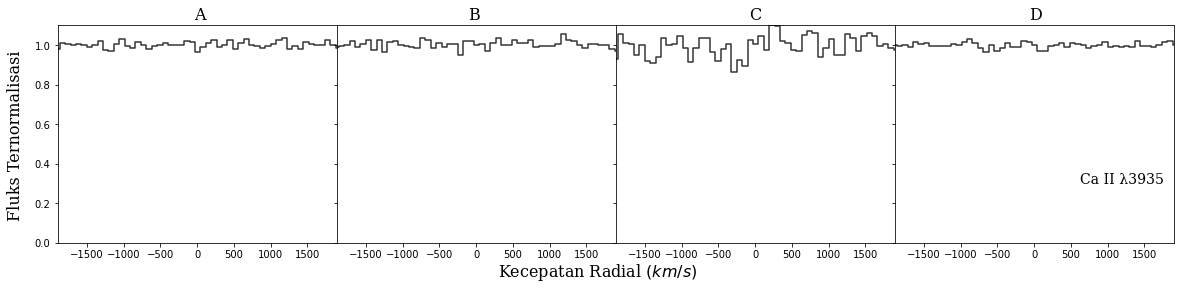

In [33]:
# (A) Ca II
wavelengths_A = wave_A.value
fluxes_A = (F_A.value / co_A.value) - 1
uncertainties_A = (uncertain_A.value / co_A.value)

# (A) Na I
wavelengths_A2 = wave_A2.value
fluxes_A2 = (F_A2.value / co_A2.value) - 1
uncertainties_A2 = (uncertain_A2.value / co_A2.value)

# (B) Ca II
wavelengths_B = wave_B.value
fluxes_B = (F_B.value / co_B.value) - 1
uncertainties_B = (uncertain_B.value / co_B.value)

# (B) Na I
wavelengths_B2 = wave_B2.value
fluxes_B2 = (F_B2.value / co_B2.value) - 1
uncertainties_B2 = (uncertain_B2.value / co_B2.value)

# (C)
wavelengths_C = wave_C.value
fluxes_C = (F_C.value / co_C.value) - 1
uncertainties_C = (uncertain_C.value / co_C.value)

# (C)
wavelengths_C2 = wave_C2.value
fluxes_C2 = (F_C2.value / co_C2.value) - 1
uncertainties_C2 = (uncertain_C2.value / co_C2.value)

# (D)
wavelengths_D = wave_D.value
fluxes_D = (F_D.value / co_D.value) - 1
uncertainties_D = (uncertain_D.value / co_D.value)

# (D)
wavelengths_D2 = wave_D2.value
fluxes_D2 = (F_D2.value / co_D2.value) - 1
uncertainties_D2 = (uncertain_D2.value / co_D2.value)

# (G1)
wavelengths_G = wave_G.value
fluxes_G = (F_G.value / co_G.value) - 1
uncertainties_G = (uncertain_G.value / co_D.value)

# (G1)
wavelengths_G_B = wave_G_B.value
fluxes_G_B = (F_G_B.value / co_G_B.value) - 1
uncertainties_G_B = (uncertain_G_B.value / co_G_B.value)

# (G2)
wavelengths_G2 = wave_G2.value
fluxes_G2 = (F_G2.value / co_G2.value) - 1
uncertainties_G2 = (uncertain_G2.value / co_G2.value)

# (G2)
wavelengths_G2_B = wave_G2_B.value
fluxes_G2_B = (F_G2_B.value / co_G2_B.value) - 1
uncertainties_G2_B = (uncertain_G2_B.value / co_G2_B.value)

v_3935_A = c_kms * (wavelengths_A - lambda_3935) / lambda_3935
v_3935_B = c_kms * (wavelengths_B - lambda_3935) / lambda_3935
v_3935_C = c_kms * (wavelengths_C - lambda_3935) / lambda_3935
v_3935_D = c_kms * (wavelengths_D - lambda_3935) / lambda_3935
v_3935_G = c_kms * (wavelengths_G - lambda_3935) / lambda_3935

v_5892_A = c_kms * (wavelengths_A2 - lambda_5892) / lambda_5892
v_5892_B = c_kms * (wavelengths_B2 - lambda_5892) / lambda_5892
v_5892_C = c_kms * (wavelengths_C2 - lambda_5892) / lambda_5892
v_5892_D = c_kms * (wavelengths_D2 - lambda_5892) / lambda_5892
v_5892_G = c_kms * (wavelengths_G2 - lambda_5892) / lambda_5892

f, ax = plt.subplots(1, 4, sharey='row', figsize=(20,4), gridspec_kw={'hspace': 0.3, 'wspace':0})
plt.rcParams['font.family'] = 'serif'

ax[0].plot(v_3935_A, fluxes_A+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0].set_ylim(0,1.1)
ax[0].set_xlim(-1900, 1900)

ax[1].plot(v_3935_B, fluxes_B+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1].set_xlim(-1900, 1900)

ax[2].plot(v_3935_C, fluxes_C+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[2].set_xlim(-1900, 1900)

ax[3].plot(v_3935_D, fluxes_D+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[3].set_xlim(-1900, 1900)

#f.text(0.15,0.77, 'Ca II', fontsize=14, ha='center')
#f.text(0.15,0.35, 'Na I', fontsize=14, ha='center')

f.text(0.22, 0.9, 'A', fontsize=16)
f.text(0.41, 0.9, 'B', fontsize=16)
f.text(0.605, 0.9, 'C', fontsize=16)
f.text(0.8, 0.9, 'D', fontsize=16)

f.text(0.835, 0.33, 'Ca II λ3935', fontsize=14)

f.text(0.5, 0.01, 'Kecepatan Radial $(km/s)$', fontsize=16, ha='center')
f.text(0.09, 0.5, 'Fluks Ternormalisasi', fontsize=16, va='center', rotation='vertical')

plt.show()

In [ ]:
f, ax = plt.subplots(1, 2, sharey='row', figsize=(20,4), gridspec_kw={'hspace': 0.3, 'wspace':0})
plt.rcParams['font.family'] = 'serif'

ax[0,4].plot(wavelengths_G, fluxes_G, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,4].set_ylim(-1.0,0.1)
ax[0,4].set_xlim(3895, 3995)

ax[1,4].plot(wavelengths_G_B, fluxes_G_B, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,4].set_xlim(5855, 5925)

ax[0,5].plot(wavelengths_G2, fluxes_G2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,5].set_ylim(-1.0,0.1)
ax[0,5].set_xlim(3895, 3995)

ax[1,5].plot(wavelengths_G2_B, fluxes_G2_B, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,5].set_xlim(5855, 5925)

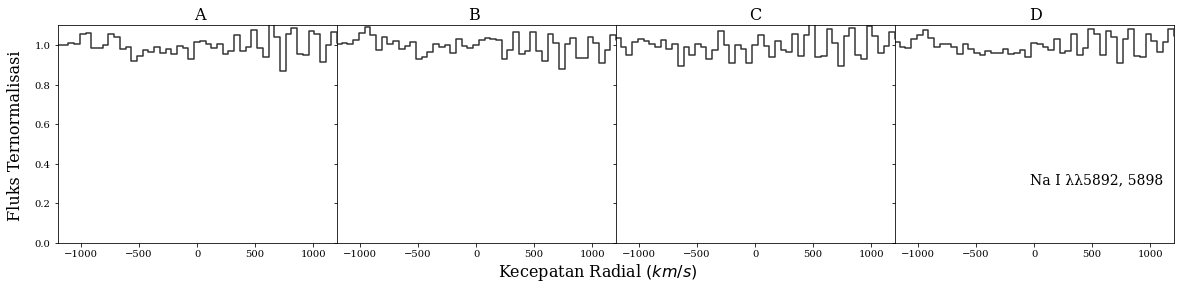

In [37]:
f, ax = plt.subplots(1, 4, sharey='row', figsize=(20,4), gridspec_kw={'hspace': 0.3, 'wspace':0})

ax[0].plot(v_5892_A, fluxes_A2+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0].set_ylim(0,1.1)
ax[0].set_xlim(-1200, 1200)

ax[1].plot(v_5892_B, fluxes_B2+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1].set_xlim(-1200, 1200)

ax[2].plot(v_5892_C, fluxes_C2+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[2].set_xlim(-1200, 1200)

ax[3].plot(v_5892_D, fluxes_D2+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[3].set_xlim(-1200, 1200)


#f.text(0.15,0.77, 'Ca II', fontsize=14, ha='center')
#f.text(0.15,0.35, 'Na I', fontsize=14, ha='center')

f.text(0.22, 0.9, 'A', fontsize=16)
f.text(0.41, 0.9, 'B', fontsize=16)
f.text(0.605, 0.9, 'C', fontsize=16)
f.text(0.8, 0.9, 'D', fontsize=16)

f.text(0.8, 0.33, 'Na I λλ5892, 5898', fontsize=14)

f.text(0.5, 0.01, 'Kecepatan Radial $(km/s)$', fontsize=16, ha='center')
f.text(0.09, 0.5, 'Fluks Ternormalisasi', fontsize=16, va='center', rotation='vertical')

plt.show()